#  Analisis Paket Berbayar Pada Perusahaan Telekomunikasi Megaline 

Anda bekerja sebagai analis untuk operator telekomunikasi Megaline. Perusahaan tersebut menawarkan kliennya dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.
Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda akan memiliki 500 data klien Megaline: siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan.

Deskripsi dari project ini adalah :

Sebagai seorang data scientist pada perusahaan telekomunikasi Megaline, dimana background Perusahaan ini begerak dibidang Telekomunikasi. Perusahaan ini menawarkan dua paket prabayar yaitu Surf dan Ultimate. Tujuan dari project ini adalah untuk menganalisa dua paket tersebut berdasarkan sample klien agar mengetahui paket mana yang menghasilkan pendapatan keuntungan yang lebih besar, agar departemen periklanan dapat menyesuaikan anggaran iklan. 

Langkah pada analisis ini dilakukan :

1. Pra-pemrosesan data. 
2. Data Preperation.
3. Data Analyzing.
4. Menguji Hipotesis.
5. Kesimpulan Akhir. 

## Memuat data dan mempelajari informasi keseluruhan pada data

### Memuat Libary yang dibutuhkan untuk pemrosesan data

In [1]:
# Memuat semua library

# import pandas and numpy untuk proses dan manipulasi data
import pandas as pd
import numpy as np 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# import math dan scipy untuk perhitungan statistika 
import math as mt
from math import factorial
from scipy import stats as st

# import matplotlib untuk data visualisasi
import matplotlib.pyplot as plt 
from matplotlib import pyplot
%matplotlib inline

# Import seaborn untuk statistika data visualisasi
import seaborn as sns

# import date dan time untuk merubah tipe data
import time
import datetime
from datetime import datetime

# import warnings untuk menghapus peringatan saat dataset di manipulasi
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)



### Memuat Data dari csv agar dapat dijalankan dengan pandas untuk menjadi DataFrame

In [2]:
# Muat file data menjadi DataFrame

calls    = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans    = pd.read_csv('/datasets/megaline_plans.csv')
users    = pd.read_csv('/datasets/megaline_users.csv')


###  Memuat Informasi dari setiap dataset

#### Dataset calls

In [3]:
# Informasi dataset calls

print('Head dataset "calls":')
calls.head()

Head dataset "calls":


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
print('info dataset "calls"')
calls.info()

info dataset "calls"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
print('distribusi statisik pada dataser "calls"')
calls.describe()

distribusi statisik pada dataser "calls"


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [6]:
print('memeriksa nilai yang hilang / na')
calls.isna().sum()

memeriksa nilai yang hilang / na


id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [7]:
print('panjang baris dari dataset "calls":')
calls.shape

panjang baris dari dataset "calls":


(137735, 4)

In [8]:
print('memeriksa duplikasi pada dataset "calls":')
print('nilai duplikat pada dataset "calls":', calls.duplicated().sum())

memeriksa duplikasi pada dataset "calls":
nilai duplikat pada dataset "calls": 0


#### Dataset Internet

In [9]:
print('Head dataset "internet":')
internet.head()

Head dataset "internet":


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [10]:
print('info dataset "internet"')
internet.info()

info dataset "internet"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
print('distribusi statisik pada dataser "internet"')
internet.describe()

distribusi statisik pada dataser "internet"


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [12]:
print('memeriksa nilai yang hilang / na')
internet.isna().sum()

memeriksa nilai yang hilang / na


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [13]:
print('panjang baris dari dataset "internet":')
internet.shape

panjang baris dari dataset "internet":


(104825, 4)

In [14]:
print('memeriksa duplikasi pada dataset "internet":')
print('nilai duplikat pada dataset "internet":', internet.duplicated().sum())

memeriksa duplikasi pada dataset "internet":
nilai duplikat pada dataset "internet": 0


#### Dataset Messages

In [15]:
print('Head dataset "messages":')
messages.head()

Head dataset "messages":


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [16]:
print('info dataset "messages"')
messages.info()

info dataset "messages"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
print('distribusi statisik pada dataser "messages"')
messages.describe()

distribusi statisik pada dataser "messages"


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [18]:
print('memeriksa nilai yang hilang / na')
messages.isna().sum()

memeriksa nilai yang hilang / na


id              0
user_id         0
message_date    0
dtype: int64

In [19]:
print('panjang baris dari dataset "messages":')
messages.shape

panjang baris dari dataset "messages":


(76051, 3)

In [20]:
print('memeriksa duplikasi pada dataset "messages":')
print('nilai duplikat pada dataset "messages":', messages.duplicated().sum())

memeriksa duplikasi pada dataset "messages":
nilai duplikat pada dataset "messages": 0


#### Dataset Plans

In [21]:
print('Head dataset "plans":')
plans.head()

Head dataset "plans":


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [22]:
print('info dataset "plans"')
plans.info()

info dataset "plans"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [23]:
print('distribusi statisik pada dataser "plans"')
plans.describe()

distribusi statisik pada dataser "plans"


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [24]:
print(' ID dari dataset plans: ')
plans['plan_name'].describe().reset_index()

 ID dari dataset plans: 


,index,plan_name
0,count,2
1,unique,2
2,top,surf
3,freq,1


In [25]:
print('memeriksa nilai yang hilang / na')
plans.isna().sum()

memeriksa nilai yang hilang / na


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [26]:
print('panjang baris dari dataset "plans":')
plans.shape

panjang baris dari dataset "plans":


(2, 8)

In [27]:
print('memeriksa duplikasi pada dataset "plans":')
print('nilai duplikat pada dataset "plans":', plans.duplicated().sum())

memeriksa duplikasi pada dataset "plans":
nilai duplikat pada dataset "plans": 0


#### Dataset Users

In [28]:
print('Head dataset "users":')
users.head()

Head dataset "users":


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [29]:
print('info dataset "users"')
users.info()

info dataset "users"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [30]:
print('distribusi statisik pada dataset "users"')
users.describe()

distribusi statisik pada dataset "users"


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [31]:
print(' ID dari dataset plans: ')
users[['first_name', 'last_name','city', 'reg_date', 'plan', 'churn_date']].describe().reset_index()

 ID dari dataset plans: 


,index,first_name,last_name,city,reg_date,plan,churn_date
0,count,500,500,500,500,500,34
1,unique,458,399,73,266,2,29
2,top,Seymour,David,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12,surf,2018-12-18
3,freq,3,3,80,5,339,3


In [32]:
print('memeriksa nilai yang hilang / na')
users.isna().sum()

memeriksa nilai yang hilang / na


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [33]:
print('Menghitung nilai yang hilang pada column churn_date')
percent_missing = users['churn_date'].isnull().sum() * 100 / len(users)
print(f'persentase jumlah nilai yang hilang pada column churn_date : {percent_missing} %') 

Menghitung nilai yang hilang pada column churn_date
persentase jumlah nilai yang hilang pada column churn_date : 93.2 %


In [34]:
print('panjang baris dari dataset "users":')
users.shape

panjang baris dari dataset "users":


(500, 8)

In [35]:
print('memeriksa duplikasi pada dataset "users":')
print('nilai duplikat pada dataset "users":', users.duplicated().sum())

memeriksa duplikasi pada dataset "users":
nilai duplikat pada dataset "users": 0


#### Kesimpulan :

1. Dari informasi keseluruhan dari dataset, kita dapat mengidentifikasi beberapa dataset terdapat beberapa column yang memliki tipe data yang salah. untuk itu kita perlu merubah tipe data tersebut.
_______________________________________________________________________________________________________________________________

2. column yang perlu diubah tipe datanya :
a. call_date pada dataset calls perlu diubah menjadi tipe data datetime.
b. session_date pada dataset internet perlu diubah datanya menjadi tipe data datetime.
c. message_date pada dataset message perlu diubah datanya menjadi tipe data datetime.
d. reg_date dan churn_date pada dataset users perlu diubah menjadi tipe data datetime.
_______________________________________________________________________________________________________________________________

3. selanjutnya Kita juga perlu mengidentifikasi lebih detail mengenai pola pada nilai yang hilang pada column users. dan mengganti tipe data yang dibutuhkan

## Data Preperation

#### Data Calls Preparation


In [36]:
# Fungsi untuk mengubah date type to datetime dan memisahkannya ke day, month and year
def new_date_features(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['day'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df    

In [37]:
# Merubah column calls_date menjadi tipe data datetime 

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [38]:
# Menerapkan fungsi untuk menambahkan day, month and year

calls = new_date_features(calls)
calls.head()

,id,user_id,call_date,duration,day,month,year
0,1000_93,1000,2018-12-27,8.52,Thursday,December,2018
1,1000_145,1000,2018-12-27,13.66,Thursday,December,2018
2,1000_247,1000,2018-12-27,14.48,Thursday,December,2018
3,1000_309,1000,2018-12-28,5.76,Friday,December,2018
4,1000_380,1000,2018-12-30,4.22,Sunday,December,2018


In [39]:
# Menambahkan column call_type untuk mengidentifikasi panggilan tak terjawab

calls['call_type'] = np.where(calls['duration'] == 0, 'Missed_call', 'Connected_call')
calls.groupby('call_type')['duration'].agg('value_counts')

call_type       duration
Connected_call  4.02          102
                8.37          102
                3.91          101
                4.30          100
                7.61          100
                            ...  
                35.74           1
                35.88           1
                36.24           1
                37.60           1
Missed_call     0.00        26834
Name: duration, Length: 2802, dtype: int64

In [40]:
# Merubah column duration menjadi tipedata interger untuk membulatkan value 

calls['duration'] = (calls['duration'].apply(np.ceil).astype('int64'))

In [41]:
# Merubah nama column

calls.columns = ['id', 'user', 'call_date', 'duration', 'day', 'month', 'year', 'call_type']
calls.head() 

,id,user,call_date,duration,day,month,year,call_type
0,1000_93,1000,2018-12-27,9,Thursday,December,2018,Connected_call
1,1000_145,1000,2018-12-27,14,Thursday,December,2018,Connected_call
2,1000_247,1000,2018-12-27,15,Thursday,December,2018,Connected_call
3,1000_309,1000,2018-12-28,6,Friday,December,2018,Connected_call
4,1000_380,1000,2018-12-30,5,Sunday,December,2018,Connected_call


#### Data Internet Preparation 

In [42]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [43]:
# Merubah tipe data mb_used ke bilangan bulat
internet['mb_used'] = internet['mb_used'].astype('int')

In [44]:
# Merubah column session date menjadi tipe data datetime 

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


In [45]:
# Menerapkan fungsi untuk menambahkan day, month and year

internet = new_date_features(internet)
internet

,id,user_id,session_date,mb_used,day,month,year
0,1000_13,1000,2018-12-29,89,Saturday,December,2018
1,1000_204,1000,2018-12-31,0,Monday,December,2018
2,1000_379,1000,2018-12-28,660,Friday,December,2018
3,1000_413,1000,2018-12-26,270,Wednesday,December,2018
4,1000_442,1000,2018-12-27,880,Thursday,December,2018
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218,Saturday,October,2018
104821,1499_216,1499,2018-12-30,304,Sunday,December,2018
104822,1499_217,1499,2018-09-22,292,Saturday,September,2018
104823,1499_218,1499,2018-12-07,0,Friday,December,2018


In [46]:
# Merubah nama column

internet.columns = ['id', 'user', 'session_date', 'data_used', 'day', 'month', 'year']
internet

,id,user,session_date,data_used,day,month,year
0,1000_13,1000,2018-12-29,89,Saturday,December,2018
1,1000_204,1000,2018-12-31,0,Monday,December,2018
2,1000_379,1000,2018-12-28,660,Friday,December,2018
3,1000_413,1000,2018-12-26,270,Wednesday,December,2018
4,1000_442,1000,2018-12-27,880,Thursday,December,2018
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218,Saturday,October,2018
104821,1499_216,1499,2018-12-30,304,Sunday,December,2018
104822,1499_217,1499,2018-09-22,292,Saturday,September,2018
104823,1499_218,1499,2018-12-07,0,Friday,December,2018


#### Data Messages Preparation

In [47]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [48]:
# Merubah column message_date menjadi tipe data datetime 

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [49]:
# Menerapkan fungsi untuk menambahkan day, month and year

messages = new_date_features(messages)
messages.head()

,id,user_id,message_date,day,month,year
0,1000_125,1000,2018-12-27,Thursday,December,2018
1,1000_160,1000,2018-12-31,Monday,December,2018
2,1000_223,1000,2018-12-31,Monday,December,2018
3,1000_251,1000,2018-12-27,Thursday,December,2018
4,1000_255,1000,2018-12-26,Wednesday,December,2018


In [50]:
# Merubah nama column

messages.columns = ['id', 'user', 'message date', 'day', 'month', 'year']
messages.head()

,id,user,message date,day,month,year
0,1000_125,1000,2018-12-27,Thursday,December,2018
1,1000_160,1000,2018-12-31,Monday,December,2018
2,1000_223,1000,2018-12-31,Monday,December,2018
3,1000_251,1000,2018-12-27,Thursday,December,2018
4,1000_255,1000,2018-12-26,Wednesday,December,2018


#### Data Plans Preparation

In [51]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [52]:
# Merubah nama column

plans.columns = ['messages_included', 'data_volume_per_month', 'minutes_included', 'monthly_fee', 'price_per_gb', 'price_per_message', 'price_per_minute', 'plan']
plans.head()

,messages_included,data_volume_per_month,minutes_included,monthly_fee,price_per_gb,price_per_message,price_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


#### Data Users Preparation

In [53]:
users.head(25)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [54]:
# Merubah column message_date menjadi tipe data datetime 

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [55]:
# Merubah column churn_date menjadi tipe data datetime 

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [56]:
# Meynyesuaikan nama column

users.columns = ['user', 'first_name', 'last_name', 'age', 'city', 'subscription_date', 'plan', 'churn_date']

In [57]:
# membuat kategori untuk nilai yang hilang pada column customer_churn berdasarkan churn_date

users['customer_churn'] = np.where(users['churn_date'].isnull(), 'No', 'Yes')
users.head(25) 

,user,first_name,last_name,age,city,subscription_date,plan,churn_date,customer_churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,No
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,No
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,No
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,No
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,No
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Yes
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,No
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,No
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,No


In [58]:
# menampilkan jumlah nilai yang hilang (NaT) pada column churn_date

users['churn_date'].isnull().sum()

466

In [59]:
# Menampilkan nilai unique pada column churn_date

users['churn_date'].sort_values().unique()

array(['2018-07-31T00:00:00.000000000', '2018-08-16T00:00:00.000000000',
       '2018-08-19T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-09-07T00:00:00.000000000', '2018-09-17T00:00:00.000000000',
       '2018-09-18T00:00:00.000000000', '2018-10-03T00:00:00.000000000',
       '2018-10-07T00:00:00.000000000', '2018-10-13T00:00:00.000000000',
       '2018-10-22T00:00:00.000000000', '2018-11-11T00:00:00.000000000',
       '2018-11-14T00:00:00.000000000', '2018-11-16T00:00:00.000000000',
       '2018-11-18T00:00:00.000000000', '2018-11-21T00:00:00.000000000',
       '2018-11-24T00:00:00.000000000', '2018-11-29T00:00:00.000000000',
       '2018-11-30T00:00:00.000000000', '2018-12-10T00:00:00.000000000',
       '2018-12-12T00:00:00.000000000', '2018-12-15T00:00:00.000000000',
       '2018-12-18T00:00:00.000000000', '2018-12-19T00:00:00.000000000',
       '2018-12-22T00:00:00.000000000', '2018-12-26T00:00:00.000000000',
       '2018-12-27T00:00:00.000000000', '2018-12-30

In [60]:
# Mengisi nilai yang hilang NaT (missing value datetime type) mengisi dengan tanggal dimana data ini dibuat.  

u = users.select_dtypes(include=['datetime'])
users[u.columns] = u.fillna(pd.to_datetime('2018-01-01'))


In [61]:
# menampilkan jumlah nilai yang hilang (NaT) pada column churn_date

users['churn_date'].isnull().sum()

0

In [62]:
# Menampilkan nilai unique pada column churn_date

users['churn_date'].sort_values().unique()

array(['2018-01-01T00:00:00.000000000', '2018-07-31T00:00:00.000000000',
       '2018-08-16T00:00:00.000000000', '2018-08-19T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-09-07T00:00:00.000000000',
       '2018-09-17T00:00:00.000000000', '2018-09-18T00:00:00.000000000',
       '2018-10-03T00:00:00.000000000', '2018-10-07T00:00:00.000000000',
       '2018-10-13T00:00:00.000000000', '2018-10-22T00:00:00.000000000',
       '2018-11-11T00:00:00.000000000', '2018-11-14T00:00:00.000000000',
       '2018-11-16T00:00:00.000000000', '2018-11-18T00:00:00.000000000',
       '2018-11-21T00:00:00.000000000', '2018-11-24T00:00:00.000000000',
       '2018-11-29T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-10T00:00:00.000000000', '2018-12-12T00:00:00.000000000',
       '2018-12-15T00:00:00.000000000', '2018-12-18T00:00:00.000000000',
       '2018-12-19T00:00:00.000000000', '2018-12-22T00:00:00.000000000',
       '2018-12-26T00:00:00.000000000', '2018-12-27

In [63]:
users.head(20)

,user,first_name,last_name,age,city,subscription_date,plan,churn_date,customer_churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-01-01,No
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-01-01,No
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-01-01,No
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-01-01,No
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-01-01,No
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-01-01,No
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Yes
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-01-01,No
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-01-01,No
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-01-01,No


Kesimpulan : 

1. Setelah mengidentifikasi dataset pada kesimpulan sebelumnya, pada kesimpulan kali ini kita memperbaiki beberapa permasalahan yang telah di identifikasi. salah satunya ada pada dataset users pada column subscription_date & churn_date, lalu call_date pada calls dataset, message_date pada dataset message dan session_date pada dataset internet dimana tipe data diatas adalaha object dan kita merubah tipedata tersebut ke tipe data datetime.
_______________________________________

2. Pada nilai yang hilang NaT kita telah mengisi value nya dengan 2018-01-01
_______________________________________

3. Pada dataset users kita juga menambahkan column costumer_churn untuk kita mendefenisikan bahwa costumer yang tidak memperpanjang paket internet dengan nilai kategorik 'no' dan costumer yang memperpanjang paket internet dengan nilai kategori 'yes'

#### Meghitung Panggilan yang dilakukan, dan menit yang digunakan perbulan

In [64]:
# Menghitung Jumlah panggilan yang dilakukan perbulan 

calls_per_month = calls.groupby(['user', 'month', 'year']).agg({'id': 'count'}).rename(columns={'id': 'calls made'})
calls_per_month.head(20)

calls made
user month     year            
1000 December  2018          16
1001 August    2018          27
     December  2018          56
     November  2018          64
     October   2018          65
     September 2018          49
1002 December  2018          47
     November  2018          55
     October   2018          11
1003 December  2018         149
1004 August    2018          49
     December  2018          50
     July      2018          49
     June      2018          44
     May       2018          21
     November  2018          54
     October   2018          61
     September 2018          42
1005 December  2018          59
1006 December  2018           9

In [65]:
# Distribusi Statistik Jumlah panggilan perbulan

calls_per_month.describe()

,calls made
count,2258.000000
mean,60.998671
std,31.770869
min,1.000000
25%,39.000000
50%,60.000000
75%,80.000000
max,205.000000


In [66]:
# Menghitung menit yang digunakan per bulan

mins_per_month = calls.groupby(['user', 'month', 'year']).agg({'duration': 'sum'}).rename(columns={'duration': 'minutes spent'})
mins_per_month.head(10)

minutes spent
user month     year               
1000 December  2018            124
1001 August    2018            182
     December  2018            412
     November  2018            426
     October   2018            393
     September 2018            315
1002 December  2018            384
     November  2018            386
     October   2018             59
1003 December  2018           1104

In [67]:
# Distribusi Statistik jumlah menit yang digunakan untuk panggilan per bulan

mins_per_month.describe()

,minutes spent
count,2258.000000
mean,435.937555
std,231.972343
min,0.000000
25%,275.000000
50%,429.000000
75%,574.750000
max,1510.000000


Kesimpulan: 

1. Dari jumlah panggilan yang dilakukan perbulan, kita dapat melihat jumlah panggilan yang dilakukan 2258. user dengan panggilan terlama dengan 205 user yang menghabiskan menghabiskan 1510 menit panggilan, dan panggilan tersingkat hanya 1 panggilan dimna lama nya 0 menit dimana kemungkinan panggilan tersebut adalah panggilan tidak terjawab. 
______________________
2.  Karena rata-rata menit yang dihabiskan lebih besar dari median, kita berharap distribusinya miring ke kanan. Ini berarti data bisa mengandung outlier.

#### Jumlah SMS yang dikirim per bulan

In [68]:
# Menghitung jumlah SMS yang dikirim per_bulan 

messages_per_month = messages.groupby(['user', 'month', 'year']).agg({'id': 'count' }).rename(columns={'id': 'messages sent'})
messages_per_month.head(10)

messages sent
user month     year               
1000 December  2018             11
1001 August    2018             30
     December  2018             44
     November  2018             36
     October   2018             53
     September 2018             44
1002 December  2018             41
     November  2018             32
     October   2018             15
1003 December  2018             50

In [69]:
# Distribusi statistik jumlah SMS yang dikirim per_bulan

messages_per_month.describe()

,messages sent
count,1806.000000
mean,42.110188
std,33.122931
min,1.000000
25%,17.000000
50%,34.000000
75%,59.000000
max,266.000000


Kesimpulan :

1. Rata-rata, sekitar 1806 pesan dikirim pengguna per bulan. Jumlah pesan terkirim paling sedikit adalah 1 sedangkan pesan terkirim paling banyak adalah 266. dengan rata-rata pesan terkirim 42.

#### Volume data per bulan

In [70]:
# Penggunaan besaran data internet per_bulan

internet_per_month = (internet.groupby(['user', 'month', 'year']).agg({'data_used': 'sum'})/1024).apply(np.ceil)*1024
internet_per_month

data_used
user month     year           
1000 December  2018     2048.0
1001 August    2018     7168.0
     December  2018    19456.0
     November  2018    19456.0
     October   2018    22528.0
...                        ...
1498 September 2018    23552.0
1499 December  2018    22528.0
     November  2018    17408.0
     October   2018    20480.0
     September 2018    13312.0

[2277 rows x 1 columns]

In [71]:
# Distribusi statistik penggunaan data pengguna internet

internet_per_month.describe()

,data_used
count,2277.000000
mean,17376.070268
std,7871.547017
min,1024.000000
25%,13312.000000
50%,17408.000000
75%,21504.000000
max,71680.000000


Kesimpulan :

1. Dari Distribusi statistik penggunaan data internet per_bulan total pengguna data internet adalah 2277, dengan rata-rata pengguanaan data internet sekitar 17.397MB. lalu pengguna yang menggunakan data internet terendah adalah 1024MB. serta penggunaan data internet paling tinggi adalah 71.680MB.

#### Pendapatan bulanan dari setiap pengguna (kurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kalikan hasilnya dengan nilai paket telepon; tambahkan biaya bulanan tergantung pada paket teleponnya)

In [72]:
# Menggabungkan Dataset 
agg_data = pd.concat([calls_per_month, mins_per_month, messages_per_month, internet_per_month], axis=1).reset_index().fillna(0)
agg_data.columns = ['user', 'month', 'year', 'calls_made', 'call_duration', 'messages_sent', 'mb_used']
agg_data

,user,month,year,calls_made,call_duration,messages_sent,mb_used
0,1000,December,2018,16.0,124.0,11.0,2048.0
1,1001,August,2018,27.0,182.0,30.0,7168.0
2,1001,December,2018,56.0,412.0,44.0,19456.0
3,1001,November,2018,64.0,426.0,36.0,19456.0
4,1001,October,2018,65.0,393.0,53.0,22528.0
...,...,...,...,...,...,...,...
2288,1498,September,2018,45.0,363.0,0.0,23552.0
2289,1499,December,2018,65.0,496.0,0.0,22528.0
2290,1499,November,2018,45.0,308.0,0.0,17408.0
2291,1499,October,2018,53.0,385.0,0.0,20480.0


In [73]:
# Menggabungkan dataset users
agg_data = agg_data.merge(users, on='user')
agg_data

,user,month,year,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,subscription_date,plan,churn_date,customer_churn
0,1000,December,2018,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-01-01,No
1,1001,August,2018,27.0,182.0,30.0,7168.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-01-01,No
2,1001,December,2018,56.0,412.0,44.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-01-01,No
3,1001,November,2018,64.0,426.0,36.0,19456.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-01-01,No
4,1001,October,2018,65.0,393.0,53.0,22528.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-01-01,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,September,2018,45.0,363.0,0.0,23552.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-01-01,No
2289,1499,December,2018,65.0,496.0,0.0,22528.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-01-01,No
2290,1499,November,2018,45.0,308.0,0.0,17408.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-01-01,No
2291,1499,October,2018,53.0,385.0,0.0,20480.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-01-01,No


In [74]:
# Menggabungkan dataset plans

agg_data = agg_data.merge(plans, left_on='plan', right_on='plan')
agg_data

,user,month,year,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,...,plan,churn_date,customer_churn,messages_included,data_volume_per_month,minutes_included,monthly_fee,price_per_gb,price_per_message,price_per_minute
0,1000,December,2018,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,...,ultimate,2018-01-01,No,1000,30720,3000,70,7,0.01,0.01
1,1006,December,2018,9.0,59.0,139.0,32768.0,Jesusa,Bradford,73,...,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01
2,1006,November,2018,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,...,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01
3,1008,December,2018,85.0,634.0,26.0,15360.0,Emely,Hoffman,53,...,ultimate,2018-01-01,No,1000,30720,3000,70,7,0.01,0.01
4,1008,November,2018,63.0,446.0,37.0,24576.0,Emely,Hoffman,53,...,ultimate,2018-01-01,No,1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,September,2018,45.0,363.0,0.0,23552.0,Scot,Williamson,51,...,surf,2018-01-01,No,50,15360,500,20,10,0.03,0.03
2289,1499,December,2018,65.0,496.0,0.0,22528.0,Shena,Dickson,37,...,surf,2018-01-01,No,50,15360,500,20,10,0.03,0.03
2290,1499,November,2018,45.0,308.0,0.0,17408.0,Shena,Dickson,37,...,surf,2018-01-01,No,50,15360,500,20,10,0.03,0.03
2291,1499,October,2018,53.0,385.0,0.0,20480.0,Shena,Dickson,37,...,surf,2018-01-01,No,50,15360,500,20,10,0.03,0.03


In [75]:
# Menentukan Pendapatan yang didapat dari setiap pengguna dari jumlah panggilan 

agg_data['call_cost'] = agg_data.apply(lambda x: max(0, x['call_duration'] - x['minutes_included']) * x['price_per_minute'], axis = 1)

In [76]:
# Menentukan Pendapatan yang didapat dari setiap pengguna dari SMS

agg_data['message_cost'] = agg_data.apply(lambda x: max(0, x['messages_sent'] - x['messages_included']) * x['price_per_message'], axis = 1)

In [77]:
# Menentukan Pendapatan yang didapat dari setiap pengguna dari data Internet

agg_data['gb_cost'] = agg_data.apply(lambda x: np.ceil(max(0, x['mb_used'] - x['data_volume_per_month'])/1024)* x['price_per_gb'], axis = 1)

In [78]:
pd.set_option('display.max_columns', 100)

In [79]:
# Meghitung pendapatan dari jumlah biaya panggilan, jumlah biaya pesan, dan jumlah biaya data internet

agg_data['revenue'] = agg_data['call_cost'] + agg_data['message_cost'] + agg_data['gb_cost'] + agg_data['monthly_fee']
agg_data.head()

,user,month,year,calls_made,call_duration,messages_sent,mb_used,first_name,last_name,age,city,subscription_date,plan,churn_date,customer_churn,messages_included,data_volume_per_month,minutes_included,monthly_fee,price_per_gb,price_per_message,price_per_minute,call_cost,message_cost,gb_cost,revenue
0,1000,December,2018,16.0,124.0,11.0,2048.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-01-01,No,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1006,December,2018,9.0,59.0,139.0,32768.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,14.0,84.0
2,1006,November,2018,2.0,10.0,15.0,3072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
3,1008,December,2018,85.0,634.0,26.0,15360.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-01-01,No,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1008,November,2018,63.0,446.0,37.0,24576.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-01-01,No,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0


In [80]:
# Distribusi statistik pada jumlah panggilan yang dilakukan dan menit yang digunakan per bulan,
# Jumlah SMS yang dikirim per bulan,
# Volume data per bulan,
# Pendapatan bulanan dari setiap pengguna,

agg_data.describe()

,user,year,calls_made,call_duration,messages_sent,mb_used,age,messages_included,data_volume_per_month,minutes_included,monthly_fee,price_per_gb,price_per_message,price_per_minute,call_cost,message_cost,gb_cost,revenue
count,2293.000000,2293.0,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,2018.0,60.067597,429.283471,33.166594,17254.824248,45.428260,348.299171,20183.026603,1284.997819,35.699956,9.058003,0.023720,0.023720,1.264828,0.144322,27.144352,64.253458
std,143.051927,0.0,32.402563,236.320077,34.070085,7976.321502,16.764349,441.006389,7130.376976,1160.543128,23.210863,1.392652,0.009284,0.009284,3.233992,0.493515,48.444483,46.514549
min,1000.000000,2018.0,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,2018.0,38.000000,265.000000,3.000000,12288.000000,30.000000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,23.480000
50%,1245.000000,2018.0,60.000000,425.000000,26.000000,17408.000000,46.000000,50.000000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,2018.0,79.000000,572.000000,51.000000,21504.000000,61.000000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,0.000000,0.000000,40.000000,70.000000
max,1499.000000,2018.0,205.000000,1510.000000,266.000000,71680.000000,75.000000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,30.300000,6.480000,550.000000,590.370000


Kesimpulan :

1. Pada kesimpulan ini, kita telah menyiapkan dataset untuk dianalis dengan dengan menggabungkan Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan, Jumlah SMS yang dikirim per bulan, Jumlah penggunaan Volume data internet per bulan.
_____________________________

2. lalu menghitung Pendapatan keuntungan dari jumlah biaya panggilan, jumlah biaya pesan, dan jumlah biaya data internet .

## Data Analyzing

#### Analisis data exploratory 

In [81]:
# Mengelompokkan value dari data numerik dan categorical
numerical_list = []
categorical_list = []
plot_data = agg_data[['calls_made', 'call_duration', 'messages_sent', 'mb_used', 'plan', 'call_cost', 'gb_cost', 'message_cost', 'revenue']]

for column in plot_data:
    if is_numeric_dtype(plot_data[column]):
        numerical_list.append(column)
    elif is_string_dtype(plot_data[column]):
        categorical_list.append(column)
        
print('list dari tipe data numerical :', numerical_list)
print('list dari tipe data categorical : ',categorical_list)

list dari tipe data numerical : ['calls_made', 'call_duration', 'messages_sent', 'mb_used', 'call_cost', 'gb_cost', 'message_cost', 'revenue']
list dari tipe data categorical :  ['plan']


##### Histogram call_made

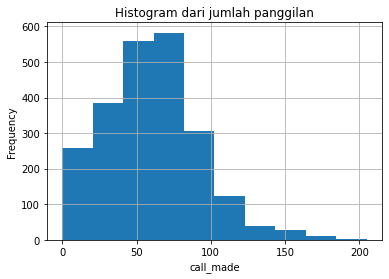

In [82]:
# Tabel Histogram dari jumlah panggilan dari pengguna
agg_data['calls_made'].hist()

# menambahkan judul dan nama sumbu 
plt.xlabel('call_made')
plt.ylabel('Frequency')
plt.title("Histogram dari jumlah panggilan");

In [83]:
# Distribusi statistik pada column jumlah panggilan
agg_data['calls_made'].describe()

count    2293.000000
mean       60.067597
std        32.402563
min         0.000000
25%        38.000000
50%        60.000000
75%        79.000000
max       205.000000
Name: calls_made, dtype: float64

In [84]:
# Menghitung rata-rata, varians, dan standar deviasi

agg_data.groupby('plan')['calls_made'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,59.811825,1025.15159,32.017989
ultimate,60.626389,1105.09666,33.242994


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

sudah benar yah!

</div>

##### Histogram call_duration

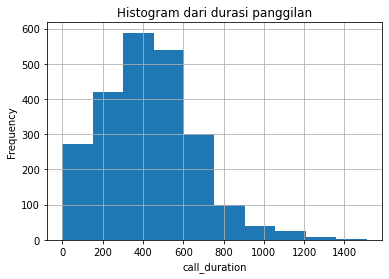

In [85]:
# Tabel Histogram dari durasi panggilan 
agg_data['call_duration'].hist()

# menambahkan judul dan nama sumbu 
plt.xlabel('call_duration')
plt.ylabel('Frequency')
plt.title("Histogram dari durasi panggilan");

In [86]:
# Distribusi statistik pada column call duration
agg_data['call_duration'].describe()

count    2293.000000
mean      429.283471
std       236.320077
min         0.000000
25%       265.000000
50%       425.000000
75%       572.000000
max      1510.000000
Name: call_duration, dtype: float64

In [87]:
# Menghitung rata-rata, varians, dan standar deviasi

agg_data.groupby('plan')['call_duration'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

sudah benar yah!

</div>

##### Histogram messages_sent

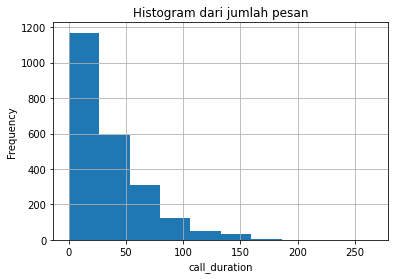

In [143]:
# Tabel Histogram dari jumlah pesan terkirim
agg_data['messages_sent'].hist()

# menambahkan judul dan nama sumbu 
plt.xlabel('call_duration')
plt.ylabel('Frequency')
plt.title("Histogram dari jumlah pesan");

In [89]:
# Distribusi statistik pada column messages_sent
agg_data['messages_sent'].describe()

count    2293.000000
mean       33.166594
std        34.070085
min         0.000000
25%         3.000000
50%        26.000000
75%        51.000000
max       266.000000
Name: messages_sent, dtype: float64

In [90]:
# Menghitung rata-rata, varians, dan standar deviasi

agg_data.groupby('plan')['messages_sent'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

sudah benar yah!

</div>

##### Histogram mb_used

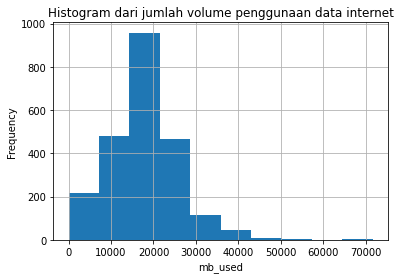

In [91]:
# Tabel Histogram dari jumlah penggunaan volume data internet 
agg_data['mb_used'].hist()

# menambahkan judul dan nama sumbu 
plt.xlabel('mb_used')
plt.ylabel('Frequency')
plt.title("Histogram dari jumlah volume penggunaan data internet");

In [92]:
# Distribusi statistik pada column messages_sent
agg_data['mb_used'].describe()

count     2293.000000
mean     17254.824248
std       7976.321502
min          0.000000
25%      12288.000000
50%      17408.000000
75%      21504.000000
max      71680.000000
Name: mb_used, dtype: float64

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

sudah benar yah!

</div>

##### Bar Plot Plan

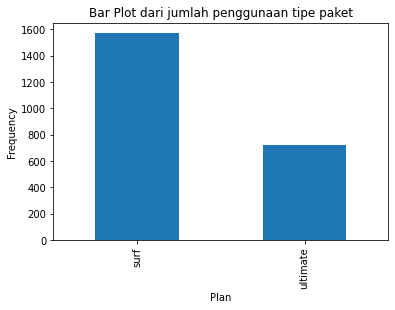

In [93]:
# Tabel bar dari jumlah penggunaan tipe paket  
agg_data['plan'].value_counts().plot(kind = 'bar')

# menambahkan judul dan nama sumbu 
plt.xlabel('Plan')
plt.ylabel('Frequency')
plt.title("Bar Plot dari jumlah penggunaan tipe paket");
plt.show()

In [94]:
# Menghitung rata-rata, varians, dan standar deviasi
agg_data['plan'].describe()

count     2293
unique       2
top       surf
freq      1573
Name: plan, dtype: object

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

sudah benar yah!

</div>

##### Histogram Revenue

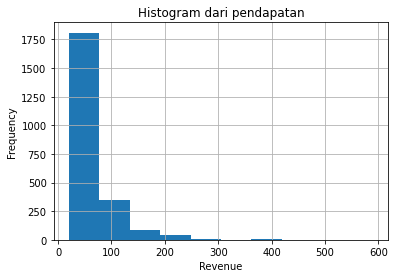

In [95]:
# Tabel Histogram dari jumlah penggunaan volume data internet 
agg_data['revenue'].hist()

# menambahkan judul dan nama sumbu 
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title("Histogram dari pendapatan");

In [96]:
# Distribusi statistik pada column messages_sent

agg_data['revenue'].describe()

count    2293.000000
mean       64.253458
std        46.514549
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: revenue, dtype: float64

In [97]:
# Menghitung rata-rata, varians, dan standar deviasi

agg_data.groupby('plan')['revenue'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,60.572905,3052.714450,55.251375
ultimate,72.294444,128.302612,11.327074


Kesimpulan  :

1.  Pada tahap analisis ini, kita menggunakan histogram dan bar plot untuk membuat tabel grafik dari variabel numerik dan kategori. pada distribusi frekuensi dari tabel grafik diatas menampilkan frekuensi data dari keseluruhan data. semua grafik diatas menunjukkan bahwa distribusinya agak miring kekanan. 
_________________________________

2. Tetapi dalam histogram messages_sent, dimana pada pada plan ultimate diketahui terdapat 166 pesan maksimal yang terkirim dan 0 pesan minimum yang terkirim dengan standar deviasiny 34 dimana meannya jauh dari median dimana jumlah mean 31 dan mediannya 24. kemungikinan data mememiliki outlier.

________________________________

3. Pada grafik plot batang dari nama paket menunjukkan bahwa pengguna paket dengan frekuensi penggunaan terbanyak pada surf 1573 dan penggunaan paket ultimate 720. dapat disimpulkan lebih banyak pengguna menggunakan paket surf dari pada ultimate. kita perlu menganalisis lebih dalam dari data ini untuk menentukan paket mana yang lebih banyak keuntungan pendapatan tiap bulan. 

_________________________________

4. Pada Tahap selanjutnya kita akan melakuakn identifikasi dan memfiter outlier dalam data.

#### Mempelajari dan Menangani Outlier

Dengan menggunakan metode IQR  ukuran variabilitas yang didasarkan pada pembagian kumpulan data menjadi kuartil. Kuartil membagi kumpulan data terurut menjadi empat bagian yang sama besar. Nilai yang memisahkan bagian-bagian ini disebut kuartil pertama, kedua (median), dan ketiga yang masing-masing dilambangkan dengan Q1, Q2, dan Q3

dengan menggunakan metode ini kita dapat mendeteksi nilai atas dan bawah dari outlier serta memfilter data yang teridentifikasi berisi outlier. 

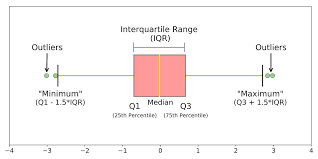

In [98]:
# fungsi menentukan batas bawah outlier

def lower_whisker(data, col):
    q1 = agg_data[col].quantile(0.25)
    q3 = agg_data[col].quantile(0.75)
    
    iqr = q3 - q1
    
    return q1 - 1.5 * iqr

In [99]:
# fungsi menentukan batas atas outlier

def upper_whisker(data, col):
    q1 = agg_data[col].quantile(0.25)
    q3 = agg_data[col].quantile(0.75)
    
    iqr = q3 - q1
    
    return q3 + 1.5 * iqr

In [100]:
# batas bawah calls_made

lower_call_made = lower_whisker(agg_data, 'calls_made')
lower_call_made

-23.5

In [101]:
# batas atas calls_made

upper_call_made = upper_whisker(agg_data, 'calls_made')
upper_call_made

140.5

In [102]:
# batas bawah calls_duration

lower_call_duration = lower_whisker(agg_data, 'call_duration')
lower_call_duration

-195.5

In [103]:
# batas atas calls_duration

upper_call_duration = upper_whisker(agg_data, 'call_duration')
upper_call_duration

1032.5

In [104]:
# batas bawah messages_sent

lower_messages_sent = lower_whisker(agg_data, 'messages_sent')
lower_messages_sent


-69.0

In [105]:
# batas atas messages_sent

upper_messages_sent = upper_whisker(agg_data, 'messages_sent')
upper_messages_sent

123.0

In [106]:
# batas bawah mb_used

lower_mb_used = lower_whisker(agg_data, 'mb_used')
lower_mb_used


-1536.0

In [107]:
# batas atas mb_used

upper_mb_used = upper_whisker(agg_data, 'mb_used')
upper_mb_used

35328.0

In [108]:
# batas bawah plan

lower_revenue = lower_whisker(agg_data, 'revenue')
lower_revenue

-46.3

In [109]:
# batas atas plan

upper_revenue = upper_whisker(agg_data, 'revenue')
upper_revenue

139.78

In [110]:
# Memuat dataset baru 

telecom = agg_data[['calls_made', 'call_duration', 'messages_sent', 'mb_used', 'revenue']]

In [111]:
# memfilter dataset baru sesuai dengan memfilter data outliernya

telecom_filtered = telecom.query('(calls_made > @lower_call_made and calls_made < @upper_call_made) and (call_duration > @lower_call_duration and call_duration < @upper_call_duration) and (messages_sent > @lower_messages_sent and messages_sent < @upper_messages_sent) and (mb_used > @lower_mb_used and mb_used < @upper_mb_used) and (revenue > @lower_revenue and revenue < @upper_revenue)')

#### Grafik Histogram dari dataset yang telah di filter outliernya

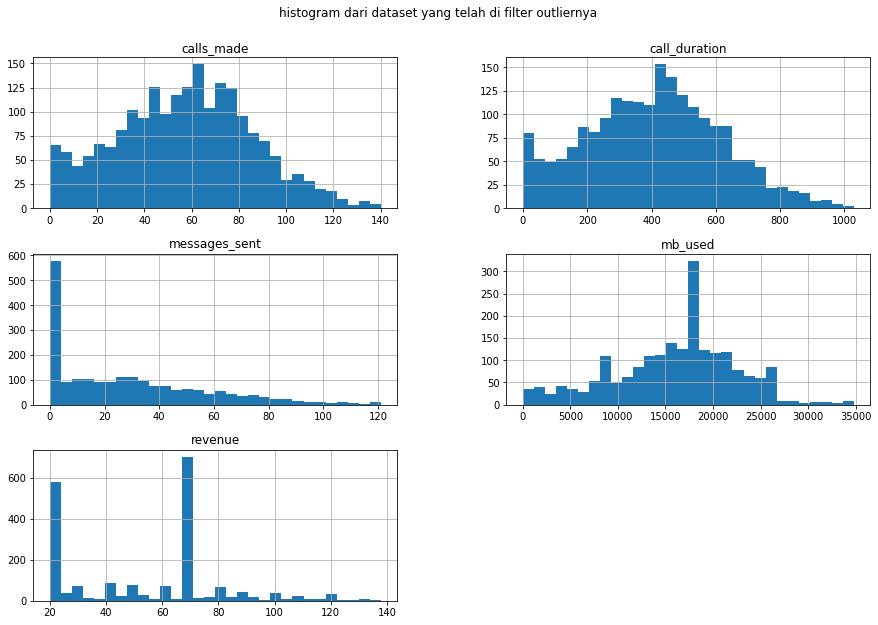

In [112]:
# Membuat grafik histogram dari dataset yang telah di filter outliernya

telecom_filtered[['calls_made', 'call_duration', 'messages_sent', 'mb_used', 'revenue']].hist(bins=30, figsize=(15, 10))
plt.suptitle('histogram dari dataset yang telah di filter outliernya', y=0.95);

####  Boxplot 

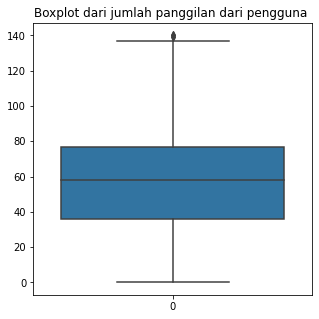

In [169]:
# Boxplot dari jumlah panggilan dari pengguna
plt.figure(figsize=(5,5))
sns.boxplot(data=telecom_filtered['calls_made'])

plt.title('Boxplot dari jumlah panggilan dari pengguna ')
plt.suptitle("")
plt.show()

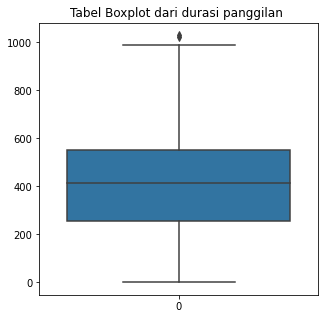

In [158]:
# Boxplot dari durasi panggilan 
plt.figure(figsize=(5,5))
sns.boxplot(data=telecom_filtered['call_duration'] )

plt.title('Boxplot dari durasi panggilan ')
plt.suptitle("")
plt.show()

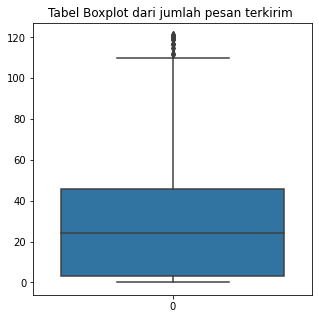

In [160]:
# Boxplot dari jumlah pesan terkirim 
plt.figure(figsize=(5,5))
sns.boxplot(data=telecom_filtered['messages_sent'] )

plt.title('Boxplot dari jumlah pesan terkirim ')
plt.suptitle("")
plt.show()

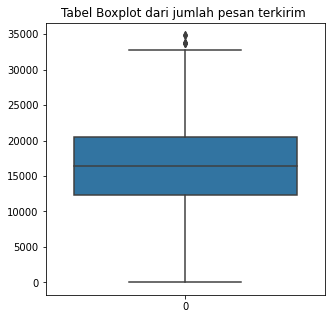

In [161]:
# Boxplot dari jumlah penggunaan volume data internet 
plt.figure(figsize=(5,5))
sns.boxplot(data=telecom_filtered['mb_used'] )

plt.title('Boxplot dari jumlah penggunaan volume data internet  ')
plt.suptitle("")
plt.show()

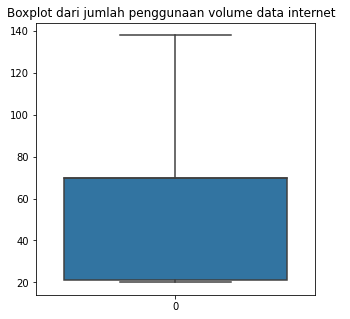

In [182]:
# Boxplot dari jumlah penggunaan volume data internet 
plt.figure(figsize=(5,5))
sns.boxplot(data=telecom_filtered['revenue'],  )

plt.title('Boxplot dari jumlah penggunaan volume data internet  ')
plt.suptitle("")
plt.show()

In [174]:
telecom_filtered

,calls_made,call_duration,messages_sent,mb_used,revenue
0,16.0,124.0,11.0,2048.0,70.0
2,2.0,10.0,15.0,3072.0,70.0
3,85.0,634.0,26.0,15360.0,70.0
4,63.0,446.0,37.0,24576.0,70.0
5,71.0,476.0,21.0,17408.0,70.0
...,...,...,...,...,...
2288,45.0,363.0,0.0,23552.0,100.0
2289,65.0,496.0,0.0,22528.0,90.0
2290,45.0,308.0,0.0,17408.0,40.0
2291,53.0,385.0,0.0,20480.0,70.0


In [113]:
# # distribusi statistik pada dataset yang telah di filter nilai outliernya

telecom_filtered.describe()

,calls_made,call_duration,messages_sent,mb_used,revenue
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,56.994158,407.346641,28.805258,15969.215190,54.985604
std,28.766879,209.955720,27.826896,6437.306912,28.448963
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,36.000000,257.250000,3.000000,12288.000000,21.230000
50%,58.000000,413.000000,24.000000,16384.000000,70.000000
75%,77.000000,550.000000,46.000000,20480.000000,70.000000
max,140.000000,1029.000000,121.000000,34816.000000,137.740000


Kesimpulan : 

1. Dengan menggunakan metode statistik IQR untuk menentukan distribusi nilai baku untuk menentukan rentang data normal dimana nilai nya dibagi menjadi 3 kuartil yakni q1 untuk nilai bawah , q2 untuk median, dan q3 untuk batas atas dari nilai outlier nya. sehingga sebaran data menjadi normal


#### Mempelajari Perilaku konsumen  :

1. menghitung jumlah panggilan yang dilakukan dan menit yang digunakan perbulan, Jumlah SMS yang dikirim per bulan Penggunaan volume data internet per bulan yang dibutuhkan costumer pada paket per bulan.  

##### Menghitung jumlah panggilan yang dilakukan dan menit yang digunakan perbulan

In [114]:
# Durasi pengguna pada paket yang digunakan perbulan 

agg_data.groupby('plan')['call_duration'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


Apa perbedaan rata-rata durasi panggilan bulanan untuk pelanggan di kedua paket?

In [115]:
# Perbedaan rata-rata penggunaan durasi panggilan perbulan di kedua paket

agg_data.groupby('plan')['call_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,428.749523,234.453150,0.0,272.0,425.0,576.00,1510.0
ultimate,720.0,430.450000,240.508762,0.0,260.0,424.0,565.25,1369.0


Pada distribusi diatas, kita dapat mengetahui dari rata-rata paket ultimate lebih banyak penggunaan durasi panggilan  perbulan daripada pengguna paket surf, mari kita lihat apakah hasil diatas akan sama ketika kita menghilangkan data ouliernya. 

In [116]:
# Filter data untuk paket ultimate

ultimate_data = agg_data.query("plan == 'ultimate'")
ultimate_plan = ultimate_data[['calls_made', 'call_duration', 'messages_sent', 'mb_used', 'revenue']]

ultimate_plan_filtered = ultimate_plan.query('(calls_made > @lower_call_made and calls_made < @upper_call_made) and (call_duration > @lower_call_duration and call_duration < @upper_call_duration) and (messages_sent > @lower_messages_sent and messages_sent < @upper_messages_sent) and (mb_used > @lower_mb_used and mb_used < @upper_mb_used) and (revenue > @lower_revenue and revenue < @upper_revenue)')
ultimate_plan_filtered.describe()

,calls_made,call_duration,messages_sent,mb_used,revenue
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,58.078788,411.772727,32.674242,16653.963636,70.360606
std,28.609078,207.147107,29.298499,6754.406703,2.618997
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,36.000000,260.000000,5.000000,13312.000000,70.000000
50%,60.000000,418.500000,28.000000,16384.000000,70.000000
75%,77.000000,541.250000,54.000000,20480.000000,70.000000
max,140.000000,987.000000,121.000000,34816.000000,98.000000


In [117]:
# variance dari paket ultimate 
for column in ultimate_plan_filtered:
    ultimate_plan_filtered[column].var()
    print('Variance dari ' + column + ' adalah {: >5.2f}'.format(ultimate_plan_filtered[column].var()))

Variance dari calls_made adalah 818.48
Variance dari call_duration adalah 42909.92
Variance dari messages_sent adalah 858.40
Variance dari mb_used adalah 45622009.90
Variance dari revenue adalah  6.86


Dari Deskripsi diatas, kita menentukan bahwa pengguna paket ultimate rata-rata melakukan 58 panggilan, dan durasi nya 411 menit perbulan, dan mengirim pesan 32 perbulan, menggunakan data 16645 MB data perbulan, dengan varians paket ultimate sebesar 819 calls_made dan 859 messages_sent.

In [118]:
# Filter data untuk paket surf 

surf_data = agg_data.query("plan == 'surf'")
surf_plan = surf_data[['calls_made', 'call_duration', 'messages_sent', 'mb_used', 'revenue']]

surf_plan_filtered = surf_plan.query('(calls_made > @lower_call_made and calls_made < @upper_call_made) and (call_duration > @lower_call_duration and call_duration < @upper_call_duration) and (messages_sent > @lower_messages_sent and messages_sent < @upper_messages_sent) and (mb_used > @lower_mb_used and mb_used < @upper_mb_used) and (revenue > @lower_revenue and revenue < @upper_revenue)')
surf_plan_filtered.describe()

,calls_made,call_duration,messages_sent,mb_used,revenue
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,56.480631,405.251076,26.973458,15645.015782,47.706191
std,28.837291,211.313929,26.919731,6257.986770,32.008347
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,37.000000,255.250000,2.000000,12288.000000,20.000000
50%,57.000000,410.000000,21.000000,16384.000000,33.865000
75%,77.000000,558.000000,42.000000,20480.000000,70.000000
max,140.000000,1029.000000,121.000000,26624.000000,137.740000


In [119]:
# variance dari paket surf 
for column in surf_plan_filtered:
    surf_plan_filtered[column].var()
    print('Variance dari ' + column + ' adalah: {: >5.2f}'.format(surf_plan_filtered[column].var()))

Variance dari calls_made adalah: 831.59
Variance dari call_duration adalah: 44653.58
Variance dari messages_sent adalah: 724.67
Variance dari mb_used adalah: 39162398.42
Variance dari revenue adalah: 1024.53


Pada deskripsi nilai distribusi diatas pada paket surf, kita dapat melihat rata-rata pengguna melakukan panggilan sebanyak 56, dengan durasi 405 menit perbulan, dan mengirim pesan sebanyak 26, dan menggunakan data 15662 MB, dengan varians paket untuk surf sebesar 831.59 call_made dan 724.67 messages_sent.

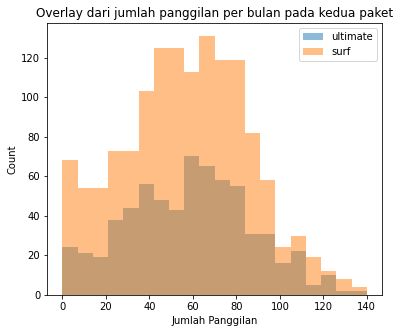

In [120]:
# Histogram dari jumlah panggilan per bulan pada kedua paket
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['calls_made'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['calls_made'], bins=20, alpha=0.5, label='surf')

# menambahkan judul dan nama sumbu
plt.xlabel('Jumlah Panggilan', size=10)
plt.ylabel('Count', size=10)
plt.title('Overlay dari jumlah panggilan per bulan pada kedua paket')
plt.legend(loc='upper right');

Pada Overlay histogram jumlah panggilan perbulan pada paket ultimate dan surf diatas, terlihat bahwa paket surf memliki reprenstasi paling banyak untuk jumlah panggilan perbulan

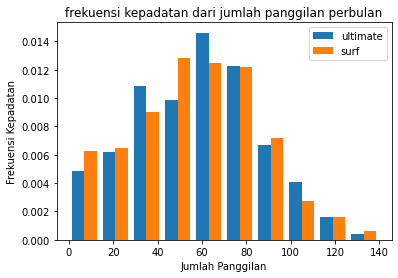

In [121]:
# Tabel Histogram dari Kepadatan frekuensi jumlah panggilan perbulan

plt.hist([ultimate_plan_filtered['calls_made'], surf_plan_filtered['calls_made']], label = ['ultimate', 'surf'], density = True)

# menambahkan judul dan nama sumbu
plt.ylabel('Frekuensi Kepadatan')
plt.xlabel('Jumlah Panggilan')
plt.title('frekuensi kepadatan dari jumlah panggilan perbulan')
plt.legend()
plt.show()

Pada histogram kepadatan frekuensi dengan distribusi jumlah panggilan dari pengguna per bulan untuk membandingkan nilai jumlah pengguna pada paket ultimate dan surf. dengan melihat plot histogram diatas paket surf memiliki jumlah panggilan perbulan lebih banyak dibandingkan paket ultimate, dengan plot kepadatan frekunse kita dapat melihat jumlah panggilan yang dilakukan pengguna di seluruh paket telepon. 

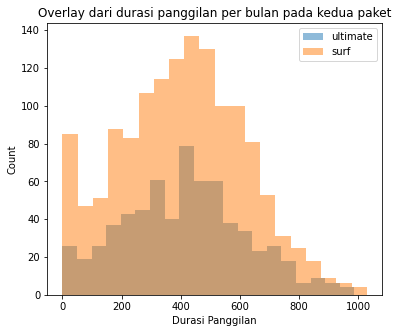

In [122]:
# Histogram dari jumlah panggilan per bulan pada kedua paket
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['call_duration'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['call_duration'], bins=20, alpha=0.5, label='surf')

# menambahkan judul dan nama sumbu
plt.xlabel('Durasi Panggilan', size=10)
plt.ylabel('Count', size=10)
plt.title('Overlay dari durasi panggilan per bulan pada kedua paket')
plt.legend(loc='upper right');

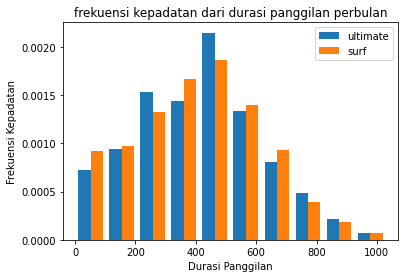

In [123]:
# Tabel Histogram dari Kepadatan frekuensi jumlah panggilan perbulan

plt.hist([ultimate_plan_filtered['call_duration'], surf_plan_filtered['call_duration']], label = ['ultimate', 'surf'], density = True)

# menambahkan judul dan nama sumbu
plt.ylabel('Frekuensi Kepadatan')
plt.xlabel('Durasi Panggilan')
plt.title('frekuensi kepadatan dari durasi panggilan perbulan')
plt.legend()
plt.show()

Dari overlay histogram plot diatas, kita dapat melihat bahwa paket ultimate  memiliki durasi panggilan per bulan lebih banyak daripada pengguna di paket surf meskipun rata-rata pengguna di paket surf melakukan lebih banyak panggilan daripada pengguna di paket ultimate.

##### Menghitung Jumlah SMS yang dikirim per bulan

In [124]:
# Jumlah sms yang dikirim pengguna pada paket kedua paket yang  

agg_data.groupby('plan')['messages_sent'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


 Apa perbedaan rata-rata pesan yang dikirim pelanggan pada kedua paket?

In [125]:
# Perbedaan rata-rata pesan yang dikirim pelanggan pada kedua paket

agg_data.groupby('plan')['messages_sent'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


Pada distribusi diatas kita dapat melitah jumlah pengguna dari kedua paket dimana pengguna surf lebih banyak dibandingkan ultimate. mari kita buktikan dengan histogram dengan menggunakan distribusi data pada kedua paket.

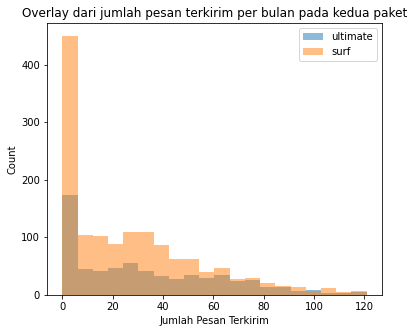

In [126]:
# Histogram dari Jumlah Pesan Terkirim per bulan pada kedua paket
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['messages_sent'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['messages_sent'], bins=20, alpha=0.5, label='surf')

# menambahkan judul dan nama sumbu
plt.xlabel('Jumlah Pesan Terkirim', size=10)
plt.ylabel('Count', size=10)
plt.title('Overlay dari jumlah pesan terkirim per bulan pada kedua paket')
plt.legend(loc='upper right');

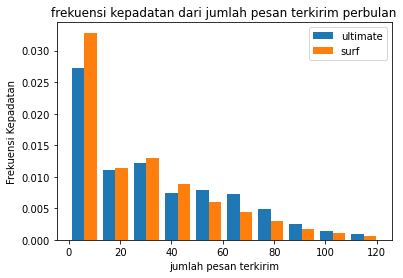

In [127]:
# Tabel Histogram dari Kepadatan frekuensi jumlah pesan terkirim  perbulan

plt.hist([ultimate_plan_filtered['messages_sent'], surf_plan_filtered['messages_sent']], label = ['ultimate', 'surf'], density = True)

# menambahkan judul dan nama sumbu
plt.ylabel('Frekuensi Kepadatan')
plt.xlabel('jumlah pesan terkirim')
plt.title('frekuensi kepadatan dari jumlah pesan terkirim perbulan')
plt.legend()
plt.show()

Dari tampilan histogram yang menunjukkan distribusi total pesan terkirim per bulan, terlihat bahwa paket surf memiliki total pesan terkirim paling banyak per bulan. pada plot kepadatan frekuensi kita dapat melihat bahwa kedua paket memiliki grafik yang sama. Namun paket surf memiliki lebih banyak pengguna daripada paket ultimate.

##### Menghitung volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan.

In [128]:
# Jumlah penggunaan volume data yang dibuthkan pengguna perbulan pada kedua paket

agg_data.groupby('plan')['mb_used'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,17049.958042,6.444453e+07,8027.734963
ultimate,17702.400000,6.161877e+07,7849.762428


Apa Perbedaan rata-rata penggunaan volume data yang dibuthkan pengguna perbulan pada kedua paket?

In [129]:
# Perbedaan rata-rata penggunaan volume data yang dibuthkan pengguna perbulan pada kedua paket

agg_data.groupby('plan')['mb_used'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,17049.958042,8027.734963,0.0,12288.0,17408.0,21504.0,71680.0
ultimate,720.0,17702.400000,7849.762428,0.0,13312.0,17408.0,21504.0,47104.0


Dapat dilihata pada distribusi statistik pada penggunaan data pada kedua paket, paket ultimate lebih banyak penggunaan data dibanding dengan paket surf. mari kita lihat dengan tabel histogram untuk melihat distribusinya.

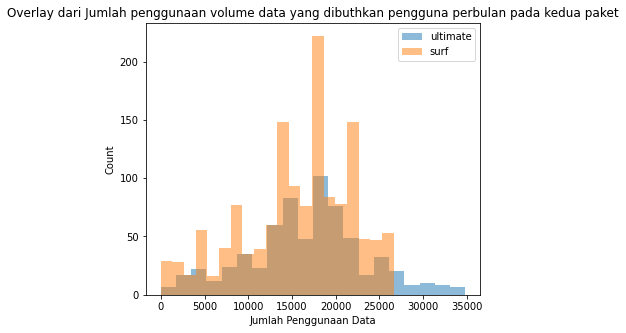

In [130]:
# Histogram dari Jumlah penggunaan volume data yang dibuthkan pengguna perbulan pada kedua paket

plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['mb_used'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['mb_used'], bins=20, alpha=0.5, label='surf')

# menambahkan judul dan nama sumbu
plt.xlabel('Jumlah Penggunaan Data', size=10)
plt.ylabel('Count', size=10)
plt.title('Overlay dari Jumlah penggunaan volume data yang dibuthkan pengguna perbulan pada kedua paket')
plt.legend(loc='upper right');

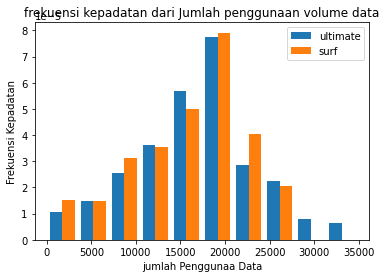

In [131]:
# Tabel Histogram dari Kepadatan frekuensi Jumlah penggunaan volume data yang dibuthkan pengguna perbulan pada kedua paket

plt.hist([ultimate_plan_filtered['mb_used'], surf_plan_filtered['mb_used']], label = ['ultimate', 'surf'], density = True)

# menambahkan judul dan nama sumbu
plt.ylabel('Frekuensi Kepadatan')
plt.xlabel('jumlah Penggunaa Data')
plt.title('frekuensi kepadatan dari Jumlah penggunaan volume data')
plt.legend()
plt.show()

Pada histogram daru jumlah penggunaan data pengguna perbulan dapat dilihat bahwa paket surf lebih banyak frekuensi penggunaannya per bulan. namun paket ultimate lebih banyak jumlahnya dibanding paket surf.

##### Rata-rata Pendapatan yang diperoleh dari paket ultimate dan surf 

In [132]:
# Rata-rata pendapatan dari pengguna kedua paket

ultimate_avg = ultimate_plan_filtered['revenue'].sum() / len(ultimate_plan_filtered['revenue'])
surf_avg = surf_plan_filtered['revenue'].sum() / len(surf_plan_filtered['revenue'])
diff = (ultimate_avg - surf_avg) / ultimate_avg * 100
print('Rata-rata pendapatan dari pengguna paket ultimate adalah :, ${:.2f}'.format(ultimate_avg))
print('Rata-rata pendapatan dari pengguna Paket Surf adalah : ${:.2f}'.format(surf_avg))
print('Persentasi Selisih Pendapatan paket ultimate and paket surf adalah {:.2f}%'.format(diff))

Rata-rata pendapatan dari pengguna paket ultimate adalah :, $70.36
Rata-rata pendapatan dari pengguna Paket Surf adalah : $47.71
Persentasi Selisih Pendapatan paket ultimate and paket surf adalah 32.20%


Kesimpulan :

1. Setelah Menghitung distribusi statistik data, kita dapat mengetahui perilaku dari pengguna di kedua paket, dimana paket ultimate rata-rata pengguna melakukan 58 panggilan, dengan menghabiskan durasi panggilan 411 menit perbulan, dan mengirim pesan sekitar 32 perbulan ,menggunakan data 16645 MB data perbulan.
___________________________

2. Pada paket surf kita dapat melihat rata-rata pengguna melakukan panggilan sebanyak 56, dengan durasi 405 menit perbulan, dan mengirim pesan sebanyak 26, dan menggunakan data 15662 MB.

_____________________________

3. Dengan memplot histogram kepadatan frekuensi kita dapat mengamati bahwa pengguna paket surf lebih banyak memliki frekuensi secara keseluruhan dari pada pengguna paket ultimate. namun rata-rata pengguna paket ultimate memiliki banyak durasi panggilan perbulan, dan mengirim pesan lebih banyak lalu membutuhkan lebih banyak volume data dibandingkan dengan paket surf. 

_____________________________

4. Dapat ditarik kesimpulan bahwa paket ultimate banyak keuntungan pendapatan rata-rata dibandingkan pada paket surf.

## Menguji Hipotesis

#### Hipotesis 1

Test 1 

Hipotesis nol : Tidak ada perbedaan antara rata-rata pendapatan dari pengguna paket ultimate dan surf.

Setelah mengetahui perbandingan  pendapatan dari paket ultimate sebesar  usd70,32, dan paket  surf sebesar usd47.80, kita ingin mengetahui apakah perbedaan dari pendapatan ini signifikan? itu tergantung dari Variansnya dimana dari perhitungan sample dari nilai distribusinya. alih-alih berasumsi berdasarkan rata-rata saja untuk memastikan, kita menggunakan data untuk melakukan uji statistik, pada percobaan ini, hipotesis nol adalah tidak ada perbedaan rata-rata dari penggunaan paket ultimate dan surf. dana hipotesis alternatifnya adlaha bahwa pendapatan rata-rata dari pengguna paket ultimate dan surf berbeda. kita dapat melakukan pengujian hipoteisi ini dengan menggunakan tingkat signifikansi atau alpha 0.05 yang berarti dalam kasus ini 5% tingat kesalahannya. dimana kita kan menolaj hipotesis nol ketika hipotesis alternatif nya benar. lalu menggunakan uji-t untuk menguji hipotesis karena membandingkan rata-rata dua kelompok untuk menentukan apakah kedua kelompok ini berbeda satu sama lain.


1. Ho (Hipotesis nol)           = Rata-rata pendapatan pada paket Ultimate = (sama dengan)  Rata-rata pendapatan pada paket Surf
_______________________________
2. H1 (Hipotesis alternatif)      = Rata-rata pendapatan pada paket Ultimate <> (berbeda dengan) Rata-rata pendapatan pada paket Surf
___________________________________
3. α (alpha) tingkat signifikansi  = 0.05 
____________________________________
4. Jika p-value < (lebih kecil), maka hipotesis nol ditolak. jika p-value > (lebih besar) , maka hipotesis nol diterima.

In [133]:
# Uji Hipotesis
ultimate = ultimate_plan_filtered['revenue']
surf = surf_plan_filtered['revenue']

# signifikasi alpha 
alpha = 0.05

# menguji hipotesis dimana rata-rata dari dua populasi bebas adalah sama
results = st.ttest_ind(ultimate, surf, equal_var = False )
print('Hasil p-value adalah:{}'.format(results.pvalue))

# Hasil dari uji hipotesis 
if (results.pvalue < alpha) :
    print('Kita dapat menolak Ho')
else :
    print('Kita tidak dapat menolak Ho')

Hasil p-value adalah:3.0381763230534514e-124
Kita dapat menolak Ho


Kesimpulan : 

Setelah menguji hipotesis nol dengan pernyataan bahwa tidak ada perbedaan antara rata-rata dari pendatapan penggunaan paket ultimate dan paket surf. dengan hasil uji p-value lebih kecil dari nilia alpha / signifikansi 0.05 dimana hipotesis nol ditolak. berarti analisi dari uji hipotesi menunjukkan baghwa rata-rata pendapatan penggunaan paket ultimate dan paket surf berbeda.

Test 2 

Hipotesis nol : tidak ada perbedaan rata-rata dari pengguna di NY-NJ dengan pendapatan pengguna dari wilayah lain. 

Hipotesis alternatif : terdapat perbedaan rata-rata pendapatan dari pengguna di wilaya NY-NJ dengan pendapatan pengguna dari wilayah lain. 
______________________
1. Pada tahap pengujian hipotesis diatas, kita akan menggunakan tingkat signifikansi atau alpha 0.05, lalu dengan menggunakan uji-t untuk menguji hipotesis untuk membandingkan rata-rata dua kelompok / sample, apakah dua kelompok ini berbeda satu sama lain.

1. Ho (Hipotesis nol) =  rata-rata pendapatan dari pengguna di NY-NJ == (sama dengan) rata-rata pendapatan dari pengguna dari wilayah lain.
_________________________________
2. H1 (Hipotesis alternatif) = rata-rata pendapatan dari pengguna di NY-NJ <> (berbeda dengan) rata-rata pendapatan dari pengguna dari wilayah lain.
_________________________________
3. α (alpha) tingkat signifikansi = 0.05
__________________________________
4. Jika p-value < (lebih kecil), maka hipotesis nol ditolak. jika p-value > (lebih besar) , maka hipotesis nol diterima.

In [134]:
# Filter data untuk menguji hipotesis

# Filter pengguna ny-nj
newyork_jersey = agg_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']

# filter pengguna not ny-nj
not_newyork_jersey = agg_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']

# menampilkan rata-rata pendaptan dari pengguna ny-nj dan not-ny-nj
print('Rata-rata pendapatan dari pengguna NY-NJ adalah ${:.2f}'.format(newyork_jersey.mean()))
print('Rata-rata pendapatan dari pengguna selain NY-NJ adalah ${:.2f}'.format(not_newyork_jersey.mean()))

Rata-rata pendapatan dari pengguna NY-NJ adalah $59.87
Rata-rata pendapatan dari pengguna selain NY-NJ adalah $65.12


Setelah menentukan rata-rata pendapatan dari pengguna di wilayah NY-NJ sebesar USD59.92, dan rata-rata pendapatan pengguna dari wilayah lain sebesar USD65.22, apakah pendapatan pada dua pengguna ini signifikan? mari kita uji hipotesis dengan tingkat signifikansi 0.05, apakah kita dapat menolak hipotesis nol atau tidak. kita akan menggunakan uji-t untuk menguji hipotesis karena kita akan membandingkan rata-rata dua kelompok untuk menentukan apakah kedua kelompok berbeda satu sama lain. 

In [135]:
# Uji Hipotesis
newyork_jersey = agg_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']
not_newyork_jersey = agg_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']

# signifikasi alpha 
alpha = 0.05

# menguji hipotesis dimana rata-rata dari dua populasi bebas adalah sama
results = st.ttest_ind(newyork_jersey, not_newyork_jersey, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# Hasil dari uji hipotesis 
if (results.pvalue < alpha) :
    print('Kita dapat menolak Ho')
else :
    print('Kita tidak dapat menolak Ho')

The p-value is: 0.03528813156344506
Kita dapat menolak Ho


Kesimpulan : 

Setelah merumuskan hipotesis nol dengan asumsi bahwa tidak ada perbedaan antara rata-rata dari pengguna di wilayah NY-NJ dan pengguna dari wilayah lain. dengan menggunakan uji-t untuk menguji hipotesis menggunakan tingkat signifikasnsi 0.05. karena p-value lebih kecil dari alpha 0.05. dapat ditarik kesimpulan bahwa hipotesis nol dapat ditolak. namun dengan menghitung jumlah rata-rata pendapatan dari pengguna di kedua sample, kita dapat mengatakan bahwa rata-rata pendapatan di kedua wilayah memiliki nilai yang signifikan.

## Kesimpulan Akhir

1. Dengan melihat informasi umum dari data, kami mengidentifikasi beberapa kesalahan seperti masalah dengan tipe data dan memperbaikinya dengan mengubah tipe data ke format yang tepat. Kami menganalisis data dengan melakukan analisis data eksplorasi dan menemukan bahwa distribusi data sedikit miring ke kanan. Kami mendeteksi dan menghapus beberapa outlier dari data, dan menggunakan data yang difilter untuk menghitung statistik. Kami menentukan bahwa pengguna paket ulitmate  rata-rata melakukan 58 panggilan, menggunakan 411 menit per bulan, mengirim sekitar 32 pesan, dan menggunakan 16645 MB data per bulan. Kami juga menghitung statistik untuk pengguna surf, dan mengamati bahwa rata-rata pengguna melakukan 56 panggilan, menggunakan 405 menit per bulan, mengirim sekitar 26 pesan, dan menggunakan 15662 MB data per bulan.
_______________________________

2. dengan memplot distribusi statistik data dengan kepadatan frekuensi pekate per pengguna untuk mengata bhwa pengguna paket ultimate memiliki jumlah panggilan, durasi panggilan,  mengirimkan pesan lebih banyak, membutuhkan lebih banyak volume data dibandingkan dengan pengguna pada paket surf. lalu kita juga menentukan bahwa pengguna paket ultimate menghasilkan lebih banyak pendapatan rata-rata dengan selisih persentasi pendapatan sebesar 32.02%. Rata-rata pendapatan dari pengguna paket ultimate adalah USD70.32 dan Rata-rata pendapatan dari pengguna Paket Surf adalah USD47.80.
_________________________________

3. Setelah menguji hipotesis nol dengan pernyataan bahwa tidak ada perbedaan antara rata-rata dari pendatapan penggunaan paket ultimate dan paket surf. dengan hasil uji p-value lebih kecil dari nilia alpha / signifikansi 0.05 dimana hipotesis nol ditolak. berarti analisi dari uji hipotesi menunjukkan baghwa rata-rata pendapatan penggunaan paket ultimate dan paket surf berbeda, Setelah merumuskan hipotesis nol dengan asumsi bahwa tidak ada perbedaan antara rata-rata dari pengguna di wilayah NY-NJ dan pengguna dari wilayah lain. dengan menggunakan uji-t untuk menguji hipotesis menggunakan tingkat signifikasnsi 0.05. karena p-value lebih kecil dari alpha 0.05. dapat ditarik kesimpulan bahwa hipotesis nol dapat ditolak. namun dengan menghitung jumlah rata-rata pendapatan dari pengguna di kedua sample, kita dapat mengatakan bahwa rata-rata pendapatan di kedua wilayah memiliki nilai yang signifikan.

_________________________________

4. Dari analisa tersebut dapat kita simpulkan bahwa 

a. pengguna pada paket ultimate memiliki durasi panggilan lebih banyak perbulan, mengirim lebih banyak pesan teks, membutuhkan lebih banyak volume data dan menghasilkan pendapatan rata-rata lebih banyak daripada pengguna paket surf.

b. pengguna paket surf rata-rata melakukan lebih banyak panggulan daripada pengguna di paket ultimate.

c. pendapatan rata-rata dari pengguna di wilayah not NY-NJ lebih besar daripada pendapatan dari pengguna di wilayah NY-NJ.

e. departemen komersial harus berinvestasi dalam lebih banyak iklan di wilayah lain karena Megaline menghasilkan lebih banyak uang di wilayah itu daripada wilayah New York-New Jersey.

f. paket ultimate lebih menguntungkan daripada paket selancar meskipun paket selancar memiliki lebih banyak pengguna secara keseluruhan daripada paket surf.

g. Kita  dapat melakukan analisis lebih lanjut untuk menentukan pendapatan rata-rata berdasarkan kelompok usia. Itu juga akan menginformasikan kepada Megaline telekomunikasi tentang kelompok usia dan media periklanan mana yang akan ditargetkan untuk tujuan pemasaran. Misalnya, jika kita menganalisis bahwa orang-orang dalam kelompok usia 1 - 25 menghasilkan lebih banyak pendapatan, kita dapat menentukan apakah pemasaran di aplikasi media sosial seperti TikTok atau Instagram akan menghasilkan lebih banyak pengguna dan pendapatan daripada iklan TV atau papan reklame.
